In [8]:
import pandas as pd
import numpy as np
import os
from pylab import mpl, plt
pd.options.display.float_format = '{:,.2f}'.format
MKT_BOOK = {}

In [4]:
# Toy universe of some S&P 500 securities
SYM_LIST = ['GOOGL', 'FB', 'TWTR', 'VRSN', 'AKAM', 'TRIP', 'MSFT', 'ADP', 'CTXS', 'IRM', 'FFIV',
           'JPM', 'BAC', 'WFC', 'C', 'PNC', 'CMA', 'PYPL', 'MA', 'V', 'AXP', 'COF', 'DFS', 'SYF',
           'EFX', 'WU', 'NAVI', 'ORCL', 'ADBE', 'CRM', 'INTU', 'ANSS', 'CDNS',
           'WMT', 'COST', 'TGT', 'DG', 'DLTR',
           'DIS', 'CMCSA', 'FOXA']

Retrieving GOOGL
Retrieving FB
Retrieving TWTR
Retrieving VRSN
Retrieving AKAM
Retrieving TRIP
Retrieving MSFT
Retrieving ADP
Retrieving CTXS
Retrieving IRM
Retrieving FFIV
Retrieving JPM
Retrieving BAC
Retrieving WFC
Retrieving C
Retrieving PNC
Retrieving CMA
Retrieving PYPL
Retrieving MA
Retrieving V
Retrieving AXP
Retrieving COF
Retrieving DFS
Retrieving SYF
Retrieving EFX
Retrieving WU
Retrieving NAVI
Retrieving ORCL
Retrieving ADBE
Retrieving CRM
Retrieving INTU
Retrieving ANSS
Retrieving CDNS
Retrieving WMT
Retrieving COST
Retrieving TGT
Retrieving DG
Retrieving DLTR
Retrieving DIS
Retrieving CMCSA
Retrieving FOXA


# Strat
* Autocorrelation **should** be **monotonically decreasing** - if it isn't, there's an opportunity.
* Even more strongly - if autocorrelation flips **negative** outside of the confidence cone, there's an opportunity

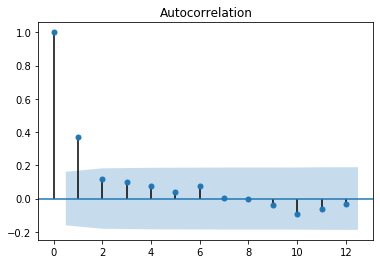

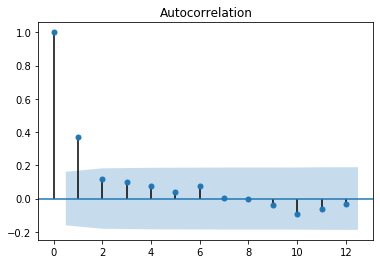

In [222]:
# 'EFX', 'WU', 'NAVI', 'ORCL', 'ADBE', 'CRM', 'INTU', 'ANSS', 'CDNS',
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
data = MKT_BOOK['GOOGL']['volume']
plot_acf(data, lags=12)

In [229]:
def autocorr(x, lags, alpha=.05):
    result, confint = acf(x, nlags=lags, alpha=alpha)
    print(result)
    print('Confidence', confint)
    return result

In [230]:
autocorr, confit = autocorr(MKT_BOOK['GOOGL']['volume'], 12)

[ 1.          0.36719424  0.11759589  0.10109346  0.07291282  0.03682142
  0.07331961  0.00629051 -0.00539814 -0.03614152 -0.09337427 -0.06195114
 -0.0298165 ]
Confidence [[ 1.          1.        ]
 [ 0.20608619  0.52830229]
 [-0.06393959  0.29913136]
 [-0.08240859  0.28459551]
 [-0.11202916  0.25785479]
 [-0.14886517  0.22250801]
 [-0.11255641  0.25919562]
 [-0.18033467  0.19291569]
 [-0.19202882  0.18123254]
 [-0.22277626  0.15049321]
 [-0.28019058  0.09344203]
 [-0.24997491  0.12607262]
 [-0.21836933  0.15873634]]


array([ 1.        ,  0.36719424,  0.11759589,  0.10109346,  0.07291282,
        0.03682142,  0.07331961,  0.00629051, -0.00539814, -0.03614152,
       -0.09337427, -0.06195114, -0.0298165 ])

In [ ]:
# Unpack values against confidence intervals and flag significant ones
for result in confint:
    upper, lower = confint